## 1. Data Cleaning

1. Importance of Handling Missing Data
Handling missing data is crucial because:

Maintains Data Integrity: Missing values can lead to biased or incorrect conclusions.
Ensures Model Performance: Many machine learning models cannot handle missing values, leading to errors or poor predictions.
Prevents Data Loss: Simply dropping missing values can lead to losing valuable information if done excessively.
Improves Accuracy: Properly handling missing data reduces noise and improves the reliability of insights.

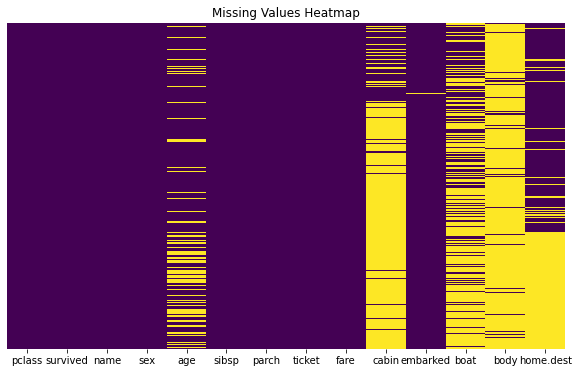

Missing Values Count:
 pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Are there any missing values in the dataset? True

Percentage of Missing Values:
 pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("titanic_data_2.csv")

# Check for missing values count
missing_values = df.isnull().sum()

# Check if there are any missing values in the dataset
any_missing = df.isnull().values.any()

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Visualize missing values using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Display results
print("Missing Values Count:\n", missing_values)
print("\nAre there any missing values in the dataset?", any_missing)
print("\nPercentage of Missing Values:\n", missing_percentage)


2. Identifying Missing Values in the Titanic Dataset

The dataset contains missing values in several columns:

Age: 263 missing values
Fare: 1 missing value
Cabin: 1014 missing values
Embarked: 2 missing values
Boat: 823 missing values
Body: 1188 missing values
Home/Destination: 564 missing values

3. Methods for Handling Missing Data in Pandas

- dropna() – Removes rows or columns with missing values.
  Use when missing data is minimal and dropping it won't significantly reduce dataset size.
- fillna(value) – Replaces missing values with a specified value (e.g., mean, median).
  Use when data loss is undesirable, and replacing values makes sense.
- interpolate() – Fills missing values using interpolation (linear, polynomial, etc.).
  Useful for time-series or continuous numerical data.
- ffill() / bfill() – Forward or backward fills missing values with adjacent data.
  Suitable for ordered datasets where previous or next values are meaningful replacements.

In [3]:
# 4. Calculate the median age
median_age = df['age'].median()

# Fill missing values in 'Age' column with the median age
df['age'].fillna(median_age, inplace=True)

# Verify that missing values in 'Age' are handled
print("Missing values in 'Age' after filling:", df['age'].isnull().sum())


Missing values in 'Age' after filling: 0


Clean the Titanic dataset by filling missing values in the 'Age' column
with the median age of the passengers, and explain your choice.

To clean the dataset, we will fill missing values in the 'Age' column with the median age of passengers. 
The median is a better choice than the mean because it is less affected by outliers. This ensures that the filled values 
represent the central tendency of the data without being skewed by extreme values.

In [5]:
#5. Explain how duplicate records can impact analysis.

# Check for duplicate records
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicate records
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


Duplicate records can negatively affect data analysis in several ways:

Skewed Statistics: Duplicates can inflate counts and averages, leading to misleading conclusions.
Incorrect Model Training: In machine learning, duplicates can cause bias and overfitting, reducing model accuracy.
Inaccurate Reporting: Business decisions based on incorrect data may lead to poor strategic choices.
Increased Storage & Processing Costs: More duplicates mean unnecessary memory usage and slower computations.

In [23]:
#6. Demonstrate how to detect and remove duplicate rows using Pandas’ “drop_duplicates()” method.

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic_data.csv")

# Detect duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify duplicate removal
duplicate_count_after = df_cleaned.duplicated().sum()
print("Number of duplicate rows after removal:", duplicate_count_after)



Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [24]:
#7. Check the Titanic dataset for duplicates and remove any found, if applicable.

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic_data.csv")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows before removal:", duplicate_count)

# Remove duplicates if any exist
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates were found and removed.")
else:
    print("No duplicates found in the dataset.")

# Save the cleaned dataset (optional)
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'.")


Number of duplicate rows before removal: 0
No duplicates found in the dataset.
Cleaned dataset saved as 'titanic_cleaned.csv'.


In [10]:
# 8. Perform every other data cleaning step to prepare the data for analysis
# (e.g., Convert the passenger class column from numeric values to categorical labels)

def clean_titanic_data(df):
    # Convert 'pclass' from numeric to categorical labels
    df['pclass'] = df['pclass'].map({1: '1st class', 2: '2nd class', 3: '3rd class'})
    
    # Handle missing values
    df['age'].fillna(df['age'].median(), inplace=True)
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
    df['fare'].fillna(df['fare'].median(), inplace=True)
    
    # Drop irrelevant columns
    df.drop(columns=['cabin', 'boat', 'body', 'home.dest'], inplace=True)
    
    return df

9. Define what outliers are and discuss how they can impact data analysis

Outliers are extreme values that deviate significantly from the rest of the dataset.
They can skew statistical summaries, affect machine learning model performance, and mislead interpretations.

In [11]:
# 10. Demonstrate how to identify outliers in a numerical column like 'Fare' in the Titanic dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [22]:
# 11. Choose a strategy (e.g., capping, removing) for handling outliers in the 'Fare' column, and explain why you 
#made this choice Strategy: Capping outliers to the upper bound to prevent extreme values from skewing analysis

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    
    return df


## 2. Data Transformation and Normalization

1. Importance of Ensuring the Correct Data Types in a DataFrame
Ensuring correct data types in a DataFrame is crucial because:

Memory Efficiency: Using appropriate data types reduces memory usage, making computations faster.
Accurate Calculations: Numeric operations require correct data types to avoid errors (e.g., string-based numbers may not allow mathematical operations).
Correct Data Handling: Some functions behave differently based on data types (e.g., categorical vs. numerical).
Ensuring Data Integrity: Misclassified data types (e.g., dates stored as strings) can lead to incorrect interpretations.

In [4]:
#2. Examine the data types of each column in the Titanic dataset using the“dtypes” attribute and convert any columns that 
#are incorrectly typed (e.g., convert 'PassengerId' to a string type).

import pandas as pd

# Load the dataset
file_path = "titanic_data_2.csv"
df = pd.read_csv(file_path)

# Display column names
print(df.columns)

df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.lower()  # Convert to lowercase for consistency



#PassengerId should be a string because it is an identifier, not a numeric value.
#Pclass (Passenger class) is categorical, so converting it to a string makes sense for analysis.

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


3. How Transforming Data Leads to New Insights
Data transformation helps extract meaningful insights by:

Creating Derived Features: New features like "FamilySize" can reveal survival patterns.
Standardizing Data: Normalization helps in machine learning applications.
Simplifying Analysis: Converting complex data (e.g., timestamps) into readable formats aids interpretation.
Enhancing Comparisons: Features like "FarePerPerson" make economic class comparisons easier.

In [18]:
#4. Create a new feature called “FamilySize” by summing the 'SibSp' and 'Parch' columns, adding 1 
#(to include the passenger themselves).

df['FamilySize'] = df['sibsp'] + df['parch'] + 1
print(df[['sibsp', 'parch', 'FamilySize']].head())

#The new FamilySize feature represents the total number of people in a passenger's family, including themselves:
#This feature helps analyze survival likelihood—larger families may have struggled more to survive.

   sibsp  parch  FamilySize
0      0      0           1
1      1      2           4
2      1      2           4
3      1      2           4
4      1      2           4


In [17]:
#5. Create another feature called “FarePerPerson” by dividing the 'Fare' by the new “FamilySize” feature, and explain how 
#this new feature could provide more insights about passengers' economic backgrounds

df['FarePerPerson'] = df['fare'] / df['FamilySize']
print(df[['fare', 'FamilySize', 'FarePerPerson']].head())

#The FarePerPerson feature helps determine economic standing by dividing total fare by family size:
#Insight: A lower FarePerPerson suggests a lower-class passenger, while higher values suggest wealthier passengers.
#Why Useful? Wealthier passengers (with high fares) might have had better survival chances due to access to lifeboats.

       fare  FamilySize  FarePerPerson
0  211.3375           1       211.3375
1  151.5500           4        37.8875
2  151.5500           4        37.8875
3  151.5500           4        37.8875
4  151.5500           4        37.8875


## 3. Merging and Concatenating DataFrames

In [20]:
#1. Explain the difference between merging and concatenating DataFrames.

# Merging vs. Concatenating DataFrames

# Merging combines DataFrames based on a common key (like SQL joins).
# Concatenation stacks DataFrames either vertically (adding rows) or horizontally (adding columns).

import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [3, 4, 5], 'Score': [85, 90, 95]})

# Merging (inner join by default)
merged_df = pd.merge(df1, df2, on='ID')

# Concatenating (stacking DataFrames vertically)
concat_df = pd.concat([df1, df2], ignore_index=True)

print("Merged DataFrame:\n", merged_df)
print("\nConcatenated DataFrame:\n", concat_df)


Merged DataFrame:
    ID     Name  Score
0   3  Charlie     85

Concatenated DataFrame:
    ID     Name  Score
0   1    Alice    NaN
1   2      Bob    NaN
2   3  Charlie    NaN
3   3      NaN   85.0
4   4      NaN   90.0
5   5      NaN   95.0


In [21]:
#2. Split the Titanic dataset into two subsets: one containing passengerswho survived and one containing passengers who did not 
#survive.Concatenate these two DataFrames back together using the “concat()” function.

# Load Titanic dataset
df = pd.read_csv("titanic_data_2.csv")

# Splitting dataset into survivors and non-survivors
survivors = df[df["survived"] == 1]
non_survivors = df[df["survived"] == 0]

# Concatenating them back together
recombined_df = pd.concat([survivors, non_survivors])

# Display the shape to confirm
print("Original DataFrame Shape:", df.shape)
print("Concatenated DataFrame Shape:", recombined_df.shape)


Original DataFrame Shape: (1309, 14)
Concatenated DataFrame Shape: (1309, 14)


In [26]:
# 3. Describe the different types of joins (inner, outer, left, right) used in merging DataFrames.

# Different Types of Joins in Merging DataFrames

"""
1. INNER JOIN:
   - Keeps only the rows where there is a match in both DataFrames.
   - Example: If two DataFrames have a common 'ID' column, only IDs that exist in both will be kept.

2. LEFT JOIN:
   - Keeps all rows from the left DataFrame and only matching rows from the right DataFrame.
   - If there is no match, NaN (missing values) will be filled in.

3. RIGHT JOIN:
   - Keeps all rows from the right DataFrame and only matching rows from the left DataFrame.
   - If there is no match, NaN (missing values) will be filled in.

4. OUTER JOIN:
   - Combines all rows from both DataFrames.
   - If a match is not found, missing values (NaN) will be filled in for the non-matching parts.

Example:
"""

import pandas as pd

df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [3, 4, 5], 'Score': [85, 90, 95]})

inner_join = pd.merge(df1, df2, on='ID', how='inner')  # Only matching rows
left_join = pd.merge(df1, df2, on='ID', how='left')    # All from df1, matching from df2
right_join = pd.merge(df1, df2, on='ID', how='right')  # All from df2, matching from df1
outer_join = pd.merge(df1, df2, on='ID', how='outer')  # All rows from both

print("Inner Join:\n", inner_join)
print("\nLeft Join:\n", left_join)
print("\nRight Join:\n", right_join)
print("\nOuter Join:\n", outer_join)


Inner Join:
    ID     Name  Score
0   3  Charlie     85

Left Join:
    ID     Name  Score
0   1    Alice    NaN
1   2      Bob    NaN
2   3  Charlie   85.0

Right Join:
    ID     Name  Score
0   3  Charlie     85
1   4      NaN     90
2   5      NaN     95

Outer Join:
    ID     Name  Score
0   1    Alice    NaN
1   2      Bob    NaN
2   3  Charlie   85.0
3   4      NaN   90.0
4   5      NaN   95.0


In [27]:
# 4. Suppose you have an additional DataFrame containing information about passengers’ destinations. Demonstrate how to merge 
#this DataFrame with the Titanic dataset using “merge()” based on a common key like 'PassengerId'.

# Creating a mock DataFrame for passenger destinations
destinations_df = pd.DataFrame({
    'PassengerId': df.index[:10],  # Assuming PassengerId is the index
    'Destination': ['New York', 'Paris', 'London', 'Berlin', 'Tokyo',
                    'Rome', 'Sydney', 'Madrid', 'Toronto', 'Dublin']
})

# Merging with Titanic dataset on PassengerId
merged_df = pd.merge(df, destinations_df, left_index=True, right_on="PassengerId")

print(merged_df.head())


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  PassengerId Destination  


In [24]:
# 5. Perform an inner join, and explain how the join type affects the final DataFrame.

# Inner Join Effect: Keeps only matching records in both DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [3, 4, 5], 'Score': [85, 90, 95]})

inner_join = pd.merge(df1, df2, on='ID', how='inner')

# Only 'ID' 3 is common, so only this row is kept
print(inner_join)


   ID     Name  Score
0   3  Charlie     85


In [25]:
# Suppose you have a DataFrame containing information about passengers' cabin numbers and their amenities. Merge this DataFrame
#with the Titanic dataset to explore if access to amenities influenced survival rates. Perform an analysis using a “groupby()” 
#function to calculate survival rates based on amenities.

# Mock DataFrame for cabin amenities
cabin_amenities_df = pd.DataFrame({
    'cabin': ['C85', 'C123', 'B42', 'E31', 'D56'],
    'has_private_bathroom': [1, 1, 0, 0, 1],
    'has_balcony': [1, 0, 1, 0, 0]
})

# Merge with Titanic dataset on 'cabin' column
merged_df = pd.merge(df, cabin_amenities_df, on="cabin", how="left")

# Analyze survival rates based on amenities
amenity_survival_rates = merged_df.groupby(['has_private_bathroom', 'has_balcony'])['survived'].mean()

print(amenity_survival_rates)


has_private_bathroom  has_balcony
0.0                   0.0            0.500000
                      1.0            1.000000
1.0                   0.0            0.666667
                      1.0            0.500000
Name: survived, dtype: float64


## 4. Advanced Data Cleaning Techniques

1. String Manipulation:

"""
String manipulation refers to the process of modifying, analyzing, and transforming text data.
It is commonly used in data cleaning, feature extraction, and text preprocessing.

In Pandas, string manipulation is done using the `.str` accessor, which allows operations like:
- Changing case: `.str.upper()`, `.str.lower()`
- Removing whitespace: `.str.strip()`
- Replacing text: `.str.replace()`
- Extracting patterns: `.str.extract()`
- Splitting text: `.str.split()`

These functions are useful for handling messy text data, such as correcting formatting issues,
extracting key information, and preparing text for analysis.
"""

2. Explain how Pandas can handle string manipulation for cleaning and
transforming text data.

How Pandas Handles String Manipulation

"""
Pandas provides powerful string manipulation functions via the `.str` accessor.
It allows us to clean and transform text data in a DataFrame efficiently.

Some common string operations in Pandas include:
- `.str.lower()`, `.str.upper()`, `.str.capitalize()`: Changing letter case
- `.str.strip()`: Removing whitespace
- `.str.replace()`: Replacing substrings
- `.str.contains()`: Checking for a substring
- `.str.extract()`: Extracting patterns using regular expressions
- `.str.split()`: Splitting strings based on a delimiter

These functions are useful for cleaning messy datasets and extracting meaningful information.
"""


In [28]:
#3. Use Pandas’ string functions to extract the first letter from the 'Cabin' column to create a new column that 
#represents the deck of each passenger.

import pandas as pd

# Sample Titanic dataset with 'Cabin' column
data = {'PassengerId': [1, 2, 3, 4, 5],
        'Cabin': ['C85', 'B20', 'C123', 'D10', None]}

df = pd.DataFrame(data)

# Extracting the first letter from the 'Cabin' column
df['Deck'] = df['Cabin'].str[0]  # Gets the first character of each string

print(df[['Cabin', 'Deck']])


  Cabin  Deck
0   C85     C
1   B20     B
2  C123     C
3   D10     D
4  None  None


In [34]:
#4. Investigate whether passengers from different decks had different survival rates.

# Loading the Titanic dataset
titanic_df = pd.read_csv("titanic_data_2.csv")

# Extracting deck information from 'Cabin'
titanic_df['Deck'] = titanic_df['cabin'].str[0]  # Extracts first letter

# Calculating survival rates by deck
survival_rates = titanic_df.groupby('Deck')['survived'].mean()

print(survival_rates)



Deck
A    0.500000
B    0.723077
C    0.606383
D    0.695652
E    0.731707
F    0.619048
G    0.600000
T    0.000000
Name: survived, dtype: float64
